<a href="https://colab.research.google.com/github/jnelly79/Colorado_Solar_Installation_Adoption_Rates_DS/blob/master/exploring_data/exploring_solar_energy_random_addresses_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas and visualizations.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import random address solar data.
df = pd.read_excel('/content/drive/My Drive/datasets/data_practicum/random_address_solar_data3.xlsx', sheet_name='cleaned')

In [ ]:
# Display random address solar data.
df.head()

,addresses,county,sun_hours,sqft,size_for_full_cvg_kW,carbon_metric_ton,upfront_cost,20_year_pay,state_fed_incentives,20_year_cost_with_solar,20_year_cost_without_solar,20_year_save
0,"13715 W 51st Ave, Arvada, CO 80002",Jefferson,1715,1216,6.3,7.7,22979,22979,-6784,19535,23706,4171
1,"5295 Gladiola St, Arvada, CO 80002",Jefferson,1496,634,7.0,6.6,25229,25229,-6559,23117,23250,133
2,"5722 Xenon Way, Arvada, CO 80002",Jefferson,1824,2995,4.8,6.6,18479,18479,-4804,17953,23250,5297
3,"5955 Carr St, Arvada, CO 80004",Jefferson,1652,1039,5.5,6.4,20729,20729,-5389,20171,23250,3079
4,"7439 W 74th Ave, Arvada, CO 80003",Jefferson,1781,1163,4.8,6.4,18479,18479,-4804,18642,23250,4608


In [ ]:
# Dispaly dataframe shape.
df.shape

(499, 12)

In [ ]:
# Display dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   addresses                   499 non-null    object 
 1   county                      499 non-null    object 
 2   sun_hours                   499 non-null    int64  
 3   sqft                        499 non-null    int64  
 4   size_for_full_cvg_kW        499 non-null    float64
 5   carbon_metric_ton           499 non-null    float64
 6   upfront_cost                499 non-null    int64  
 7   20_year_pay                 499 non-null    int64  
 8   state_fed_incentives        499 non-null    int64  
 9   20_year_cost_with_solar     499 non-null    int64  
 10  20_year_cost_without_solar  499 non-null    int64  
 11  20_year_save                499 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 46.9+ KB


In [ ]:
# Display basic statisics of dataframe.
df.describe()

,sun_hours,sqft,size_for_full_cvg,carbon_metric_ton,upfront_cost,20_year_pay,state_fed_incentives,20_year_cost_with_solar,20_year_cost_without_solar,20_year_save
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1783.572000,1234.912000,5.311600,6.728800,20079.650000,20079.650000,-5641.284000,19344.806000,23347.428000,4036.274000
std,146.410248,721.294653,0.944335,0.813273,2844.228384,2844.228384,991.384651,1873.698465,499.394717,1834.846121
min,1207.000000,211.000000,3.000000,3.400000,13229.000000,13229.000000,-8932.000000,16008.000000,22225.000000,6.000000
25%,1688.000000,788.500000,4.500000,6.300000,17729.000000,17729.000000,-6376.250000,17928.000000,23068.000000,2666.000000
50%,1808.000000,1092.000000,5.300000,6.600000,19979.000000,19979.000000,-5401.000000,18965.500000,23432.000000,4477.000000
75%,1897.000000,1484.500000,5.800000,7.600000,21479.000000,21479.000000,-4804.000000,20468.750000,23706.000000,5538.750000
max,2047.000000,5145.000000,9.000000,7.800000,31229.000000,31229.000000,-3634.000000,29767.000000,29864.000000,7424.000000


(array([  1.,   3.,   7.,  25.,  44.,  64.,  88., 117., 111.,  40.]),
 array([1207., 1291., 1375., 1459., 1543., 1627., 1711., 1795., 1879.,
        1963., 2047.]),
 <a list of 10 Patch objects>)

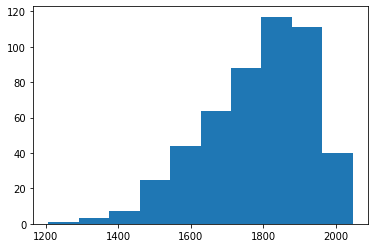

In [ ]:
# Plot and display histograms on sun hour data.
n_bins = 10
plt.hist(df['sun_hours'], n_bins)

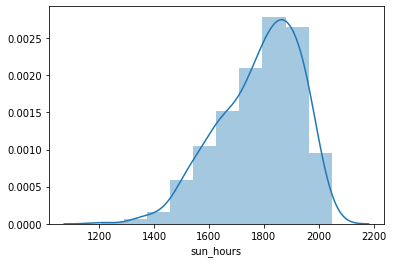

In [ ]:
# Plot and display distribution plots on sun hour data.
sns.distplot(df['sun_hours'], bins=10)

In [ ]:
# Select on float64 and int64 Dtype features and display them.
solar_num = df.select_dtypes(include=['float64','int64'])
solar_num.head()

,sun_hours,sqft,size_for_full_cvg,carbon_metric_ton,upfront_cost,20_year_pay,state_fed_incentives,20_year_cost_with_solar,20_year_cost_without_solar,20_year_save
0,1715,1216,6.3,7.7,22979,22979,-6784,19535,23706,4171
1,1496,634,7.0,6.6,25229,25229,-6559,23117,23250,133
2,1824,2995,4.8,6.6,18479,18479,-4804,17953,23250,5297
3,1652,1039,5.5,6.4,20729,20729,-5389,20171,23250,3079
4,1781,1163,4.8,6.4,18479,18479,-4804,18642,23250,4608


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb8c7e8ba8>,
      dtype=object)

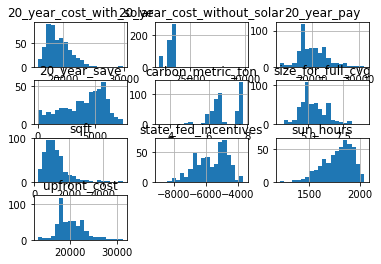

In [ ]:
# Display all the float64 and int64 histograms.
solar_num.hist(bins=20)

In [ ]:
# Get correlation with variables of interest.
sun_hour_cor = solar_num.corr()['sun_hours']

In [ ]:
# Display correlation.
sun_hour_cor

sun_hours                     1.000000
sqft                          0.096564
size_for_full_cvg            -0.604378
carbon_metric_ton            -0.090017
upfront_cost                 -0.600153
20_year_pay                  -0.600153
state_fed_incentives          0.431451
20_year_cost_with_solar      -0.672827
20_year_cost_without_solar   -0.067334
20_year_save                  0.626154
Name: sun_hours, dtype: float64

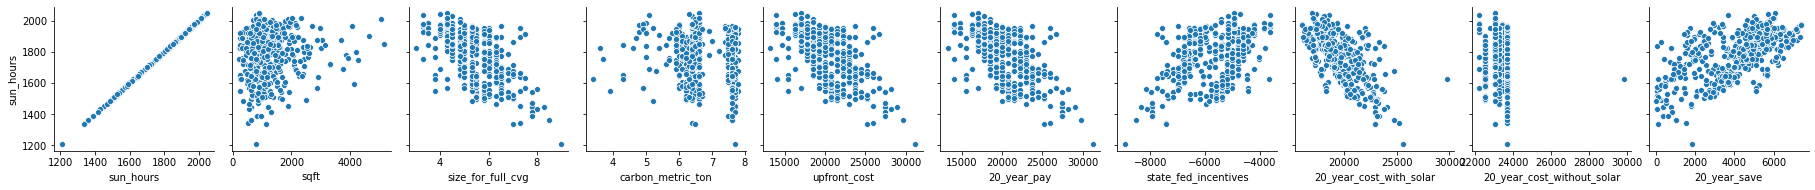

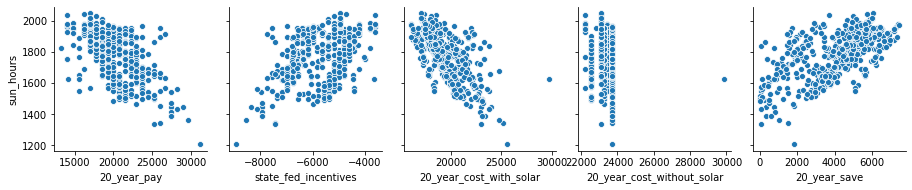

In [ ]:
# Plot correlation scatterplots using pairplot.
for i in range(0,len(solar_num.columns),5):
  sns.pairplot(solar_num, y_vars=['sun_hours'],x_vars=solar_num.columns[i:i+10])

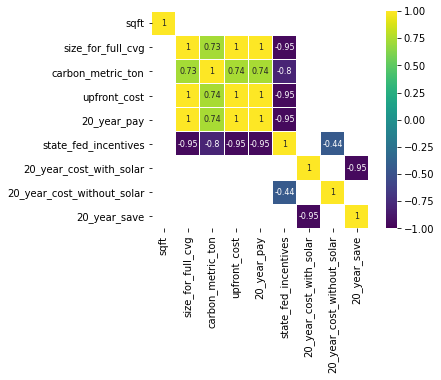

In [ ]:
# Plotting significant correlation in plot heatmap
corr = solar_num.drop('sun_hours',axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

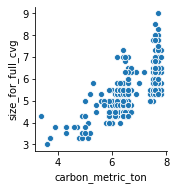

In [ ]:
# plot scatterplot correlation between size_for_full_cvg and carbon_metric_ton.
sns.pairplot(solar_num, y_vars=['size_for_full_cvg'],x_vars=['carbon_metric_ton'])